In [1]:
from utils import CleanData
from models.DecisionTree import DecisionTree
from models.neural_network import NeuralNetwork
from plotData import plotData
import warnings
from sklearn.metrics import accuracy_score
import numpy as np
from models.neural_network import bestParameters 

warnings.filterwarnings('ignore')

            3.6216       8.6661      -2.8073     -0.44699            0
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200     0.444931
std       2.842494     5.868359     4.310105     2.101683     0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000     0.000000
50%       0.495710     2.313400     0.616630    -0.586650     0.000000
75%       2.814650     6.813100     3.181600     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


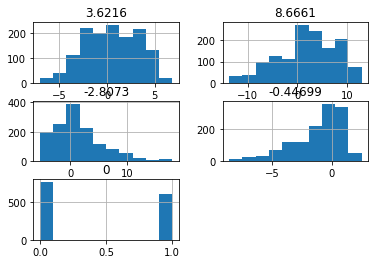

In [2]:
intial_dataframe = CleanData("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
#intial_dataframe = CleanData(".\kidney_disease.csv")
intial_dataframe.describeData()

In [5]:
column_names = ["variance", "skewness", "curtosis", "entropy", "classification"]
X_train, X_test, y_train, y_test = intial_dataframe.splitData(1 / 3, 42, column_names)

In [5]:
X_train.isnull().values.any()

False

In [8]:
Tree_class = DecisionTree (len(column_names))
tab_log_loss_tree, tab_log_loss_tree_box, optimal_depth = Tree_class.cross_validation(X_train, y_train)

In [9]:
print("Optimal depth = ", optimal_depth)

Optimal depth =  3


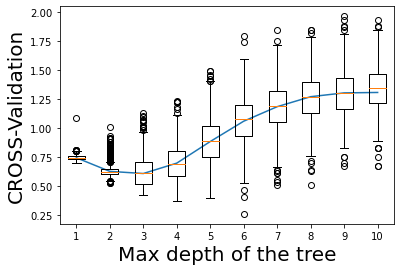

In [10]:
Tree_class.plot(X_train, y_train)

In [11]:
y_tree, y_forest, y_ada = Tree_class.adjust_classification(X_train, X_test, y_train, optimal_depth)


TypeError: can only concatenate str (not "int") to str

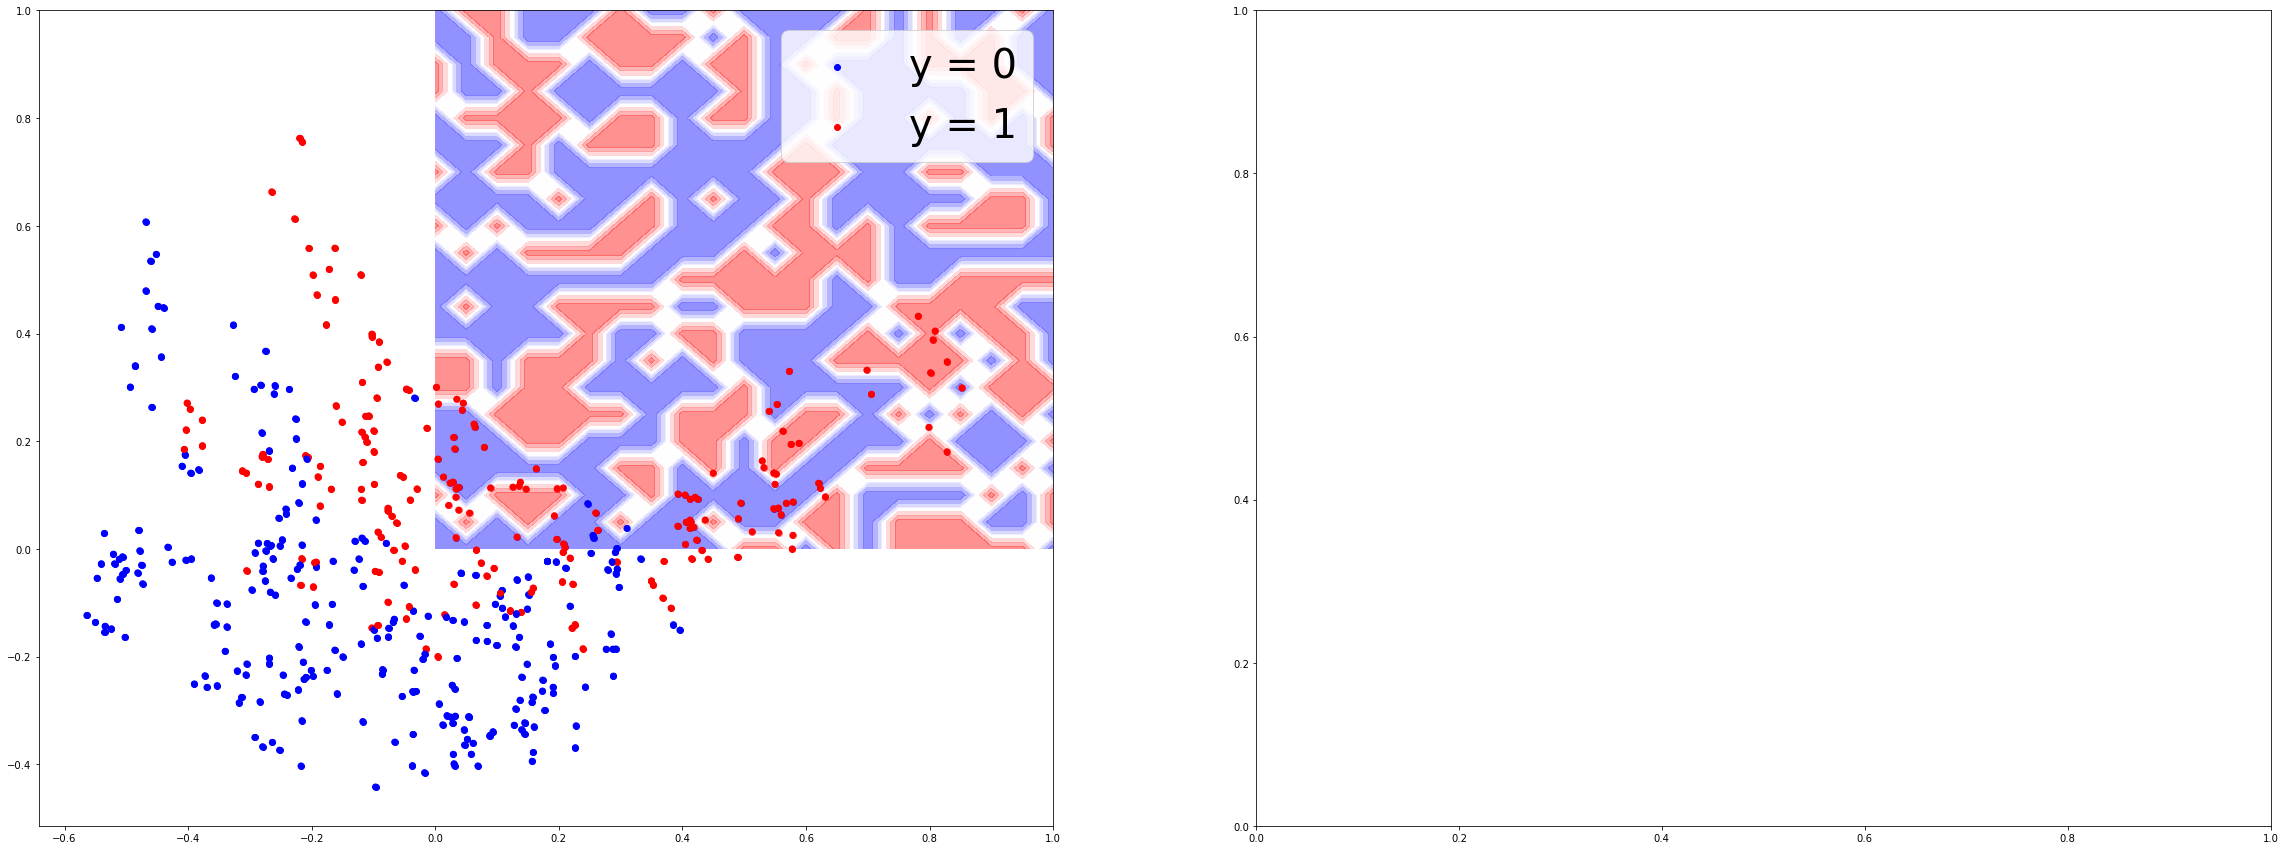

In [12]:
plotData(X_test, y_test, y_tree, X_train.columns[0],  X_train.columns[1], "DecisionTree")

In [ ]:
plotData(X_test, y_test, y_forest, "variance", "entropy", "RandomForest")

In [ ]:
plotData(X_test, y_test, y_ada, "variance", "entropy", "AdaBoost")

In [15]:
Tree_class.calculate_metrics(y_tree, y_test,"DecisionTree" )

DecisionTree  Accuracy :  0.8927789934354485
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       231
           1       0.94      0.83      0.88       226

    accuracy                           0.89       457
   macro avg       0.90      0.89      0.89       457
weighted avg       0.90      0.89      0.89       457



In [16]:
Tree_class.calculate_metrics(y_forest, y_test,"RandomForest" )

RandomForest  Accuracy :  0.9299781181619255
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       276
           1       0.87      0.96      0.92       181

    accuracy                           0.93       457
   macro avg       0.92      0.94      0.93       457
weighted avg       0.93      0.93      0.93       457



In [17]:
Tree_class.calculate_metrics(y_ada, y_test,"AdaBoost" )

AdaBoost  Accuracy :  0.9452954048140044
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       255
           1       0.94      0.93      0.94       202

    accuracy                           0.95       457
   macro avg       0.95      0.94      0.94       457
weighted avg       0.95      0.95      0.95       457



In [6]:
layers_sizes= [(5,2),(4,2),(6,2),(3,2),(4,4,2)]
activations=["logistic", "tanh"]
learning_rate=np.linspace(0.001,0.1,10)
bestParameters(X_train, X_test, y_train, y_test, layers_sizes,activations,learning_rate)

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       199

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



'The neural network with the best accuracy has the parameters: layer size: (5, 2) activation function: logistic, learning rate 0.001, with an accuracy score of : 1.0'